# deal with model

In [1]:
import os
import random
import shutil
from pathlib import Path
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# data_dir = Path("E:\桌面\plantvillage dataset\color")
data_dir = Path("E:\桌面\plantvillage dataset\grayscale")
# data_dir = Path("E:\桌面\plantvillage dataset\segmented")

In [2]:
# Here we have two class.
dataset_path_train = os.listdir(data_dir)
print (dataset_path_train)
print("Types of classes labels found: ", len(dataset_path_train))

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [3]:
image_count_train = len(list(data_dir.glob('*/*.JPG')))

In [4]:
# This Parameter we can use it in the network and model
batch_size = 32
img_height = 112
img_width = 112

In [5]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# For train data set
train_ds = image_dataset_from_directory(data_dir, 
                                        seed = 123, 
                                        image_size=(img_height, img_width), 
                                        validation_split=0.3, 
                                        subset='training')

Found 54305 files belonging to 38 classes.
Using 38014 files for training.


In [6]:
# here we can put the validate data
remaining_ds = image_dataset_from_directory(data_dir,
                                            seed = 123, 
                                            image_size=(img_height, img_width), 
                                            validation_split=0.3, 
                                            subset='training')

Found 54305 files belonging to 38 classes.
Using 38014 files for training.


In [7]:
# Split remaining_ds into validation and test datasets
val_ds = remaining_ds.take(len(remaining_ds)//2)
test_ds = remaining_ds.skip(len(remaining_ds)//2)

In [8]:
# Here We give the name of the data the we found the Benign dataset and malignant
class_names = train_ds.class_names
print(len(class_names))
print( class_names)

38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target

In [9]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 112, 112, 3)
(32,)


# create the model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation, Dropout, Dense


num_classes = 38

# Building model with data augmentation and drop out layers
# Model building - Data augmentation -> Rescaling -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Dropout -> Dense -> Dense
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Compile the model 
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 112, 112, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 16)      448       
                                                                 
 activation (Activation)     (None, 112, 112, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 56, 56, 32)        0         
                                                        

In [13]:
epochs = 20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
1188/1188 [==============================] - 240s 201ms/step - loss: 1.5125 - accuracy: 0.5746 - val_loss: 0.7669 - val_accuracy: 0.7663
Epoch 2/20
1188/1188 [==============================] - 241s 203ms/step - loss: 0.6452 - accuracy: 0.7970 - val_loss: 0.4829 - val_accuracy: 0.8471
Epoch 3/20
1188/1188 [==============================] - 250s 210ms/step - loss: 0.4247 - accuracy: 0.8626 - val_loss: 0.2906 - val_accuracy: 0.9046
Epoch 4/20
1188/1188 [==============================] - 245s 206ms/step - loss: 0.2981 - accuracy: 0.9025 - val_loss: 0.2438 - val_accuracy: 0.9189
Epoch 5/20
1188/1188 [==============================] - 243s 204ms/step - loss: 0.2112 - accuracy: 0.9281 - val_loss: 0.1488 - val_accuracy: 0.9501
Epoch 6/20
1188/1188 [==============================] - 236s 199ms/step - loss: 0.1522 - accuracy: 0.9482 - val_loss: 0.1573 - val_accuracy: 0.9457
Epoch 7/20
1188/1188 [==============================] - 249s 210ms/step - loss: 0.1345 - accuracy: 0.9538 - val_

In [14]:
preformance = model.evaluate(test_ds)

594/594 [==============================] - 34s 49ms/step - loss: 0.0396 - accuracy: 0.9867


In [15]:
preformance

[0.03964223712682724, 0.9866884350776672]

594/594 [==============================] - 35s 48ms/step


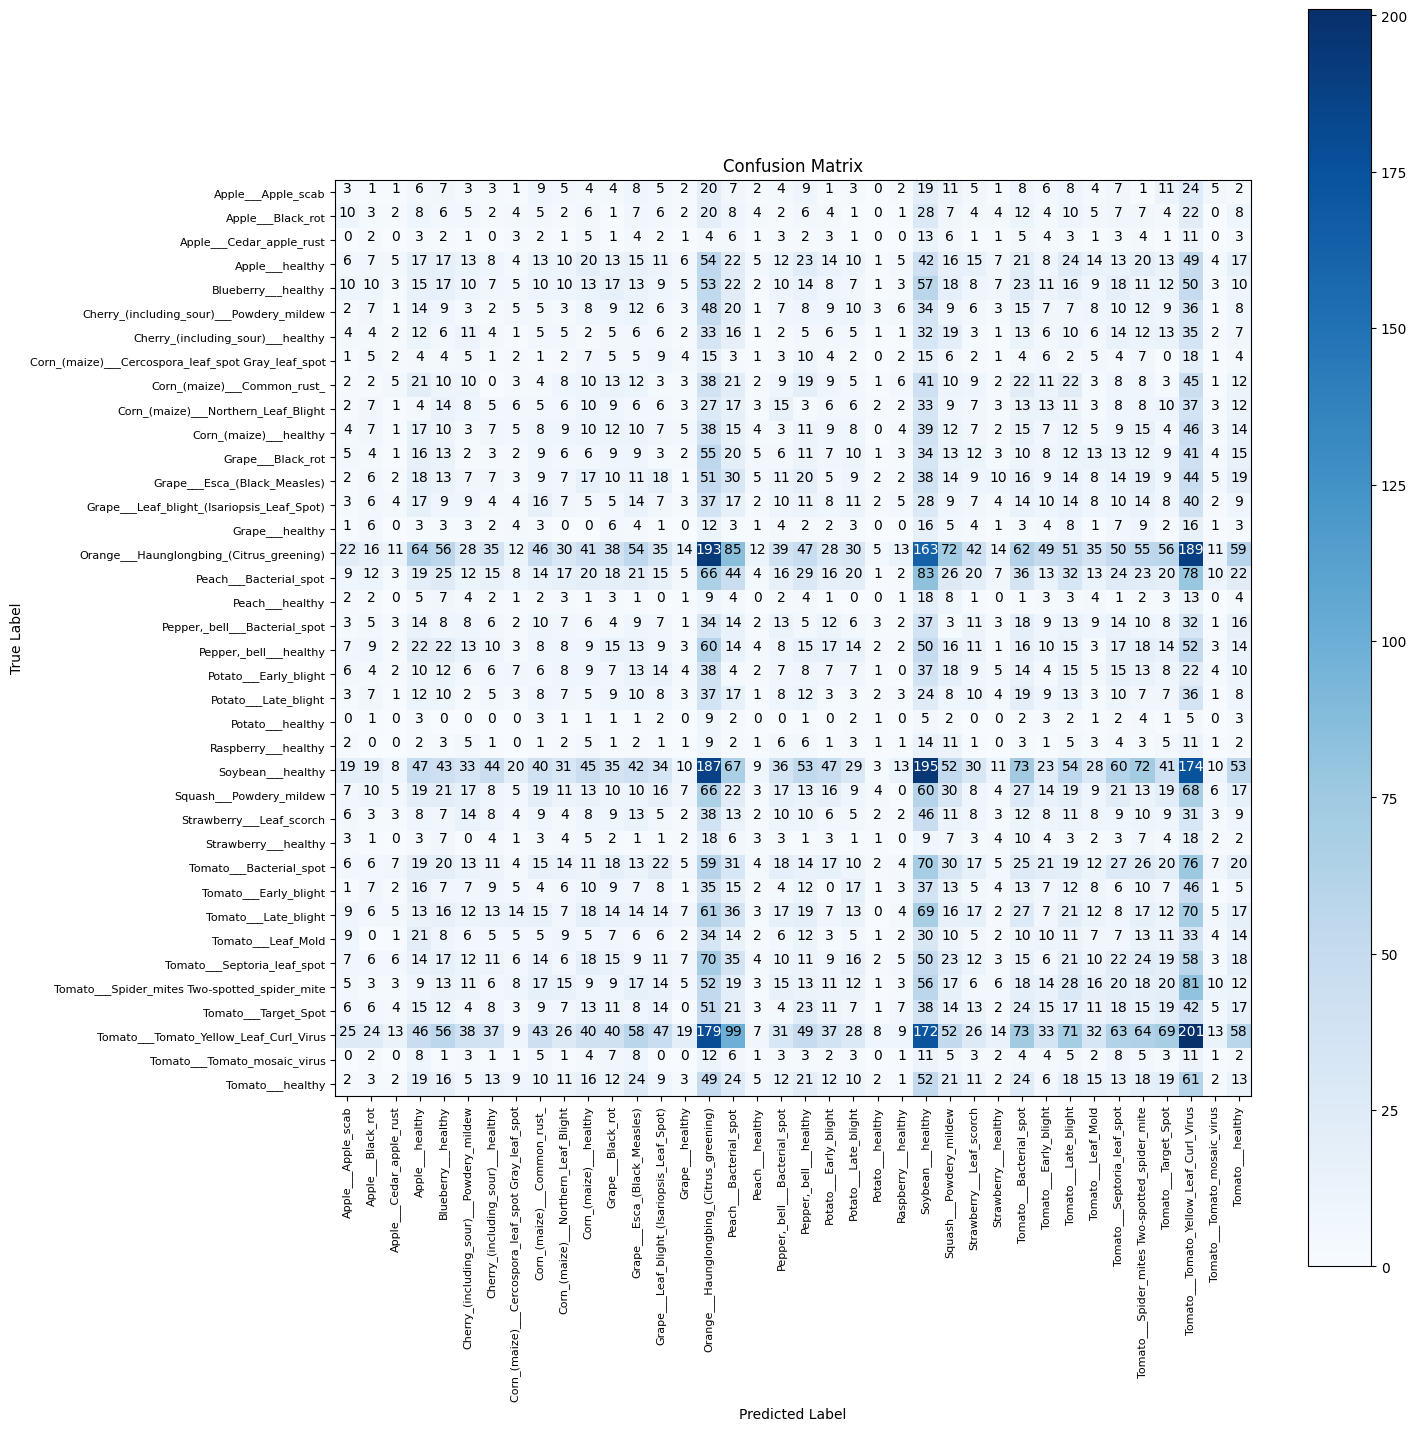

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 获取测试集的预测结果
y_pred = model.predict(test_ds)
y_pred = np.argmax(y_pred, axis=1)  # 将预测结果转换为类别标签

# 获取测试集的真实标签
y_true = []
for _, labels_batch in test_ds:
    y_true.extend(labels_batch.numpy())
y_true = np.array(y_true)

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)

# 绘制混淆矩阵图像
plt.figure(figsize=(15, 15))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90, fontsize=8)
plt.yticks(tick_marks, class_names, fontsize=8)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 在每个单元格中显示数值
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

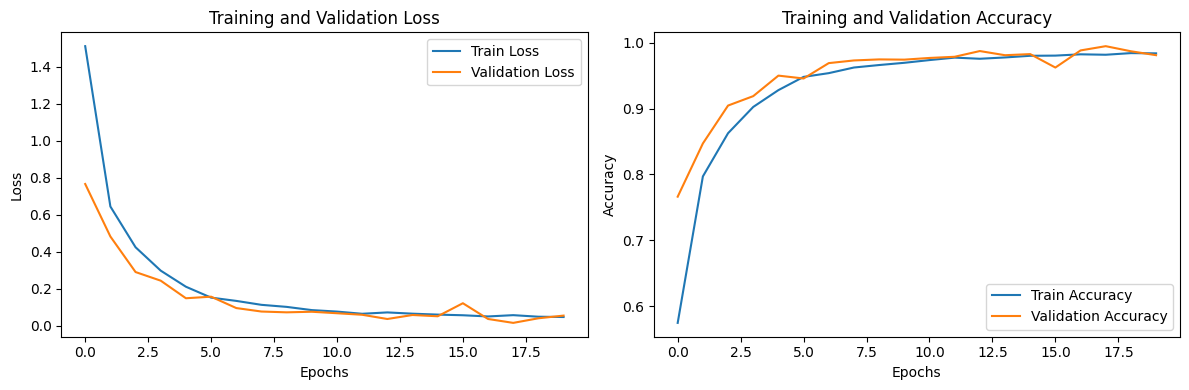

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Print loss and accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss, label='Train Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracy, label='Train Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 126ms/step
F1-score:  0.9832106423569003
594/594 [==============================] - 45s 62ms/step


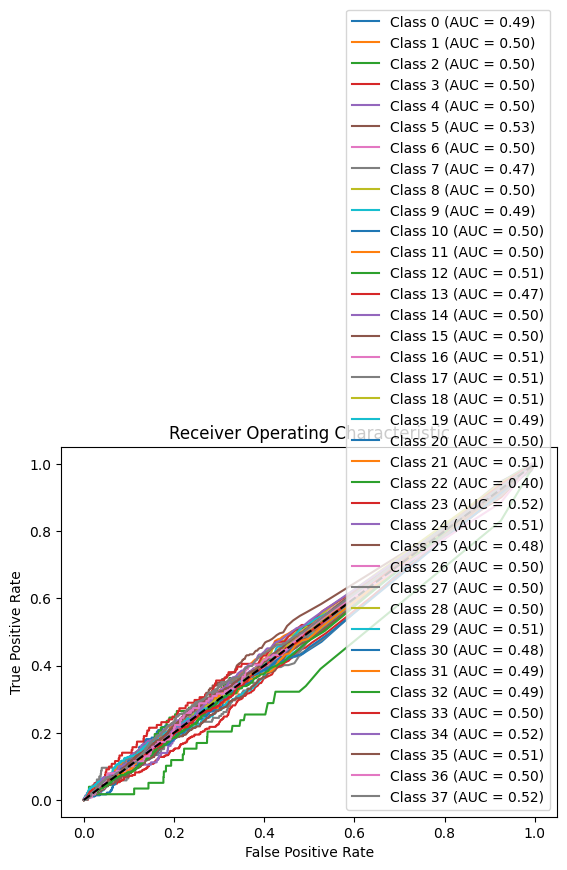

Recall for each class:  38


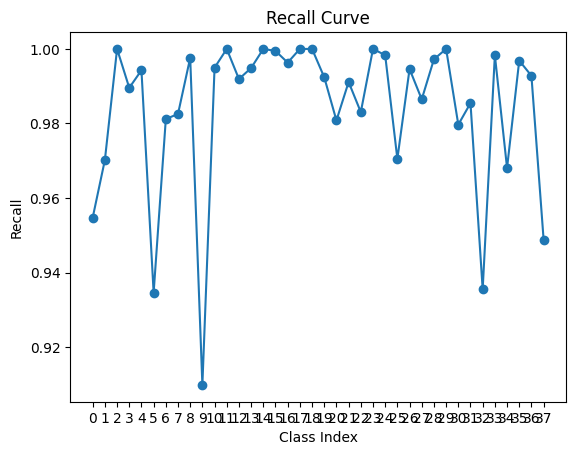

In [18]:
import os
import random
import shutil
from pathlib import Path
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score, roc_curve, auc, recall_score
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt

# Get the predicted labels and true labels for the test dataset
y_true = []
y_pred = []
for images, labels in test_ds:
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(model.predict(images), axis=-1))
    
# Calculate the F1-score
f1 = f1_score(y_true, y_pred, average='macro')

# Print F1-score
print("F1-score: ", f1)

# Get predicted probabilities for ROC curve
y_probs = model.predict(test_ds)
y_probs = tf.nn.softmax(y_probs).numpy()

# Convert true labels to one-hot encoding
y_true_one_hot = tf.one_hot(y_true, depth=num_classes).numpy()

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Calculate the recall for each class
recall = recall_score(y_true, y_pred, average=None)

# Print recall for each class
print("Recall for each class: ", len(recall))

# Plot recall curve
plt.plot(range(num_classes), recall, marker='o')
plt.xlabel('Class Index')
plt.ylabel('Recall')
plt.title('Recall Curve')
plt.xticks(range(num_classes))
plt.show()

In [19]:
from tensorflow import expand_dims, newaxis
class_names = train_ds.class_names
def predict2(model, img):
    
    img_array = img.numpy()
    img_array = expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round( (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 22ms/step


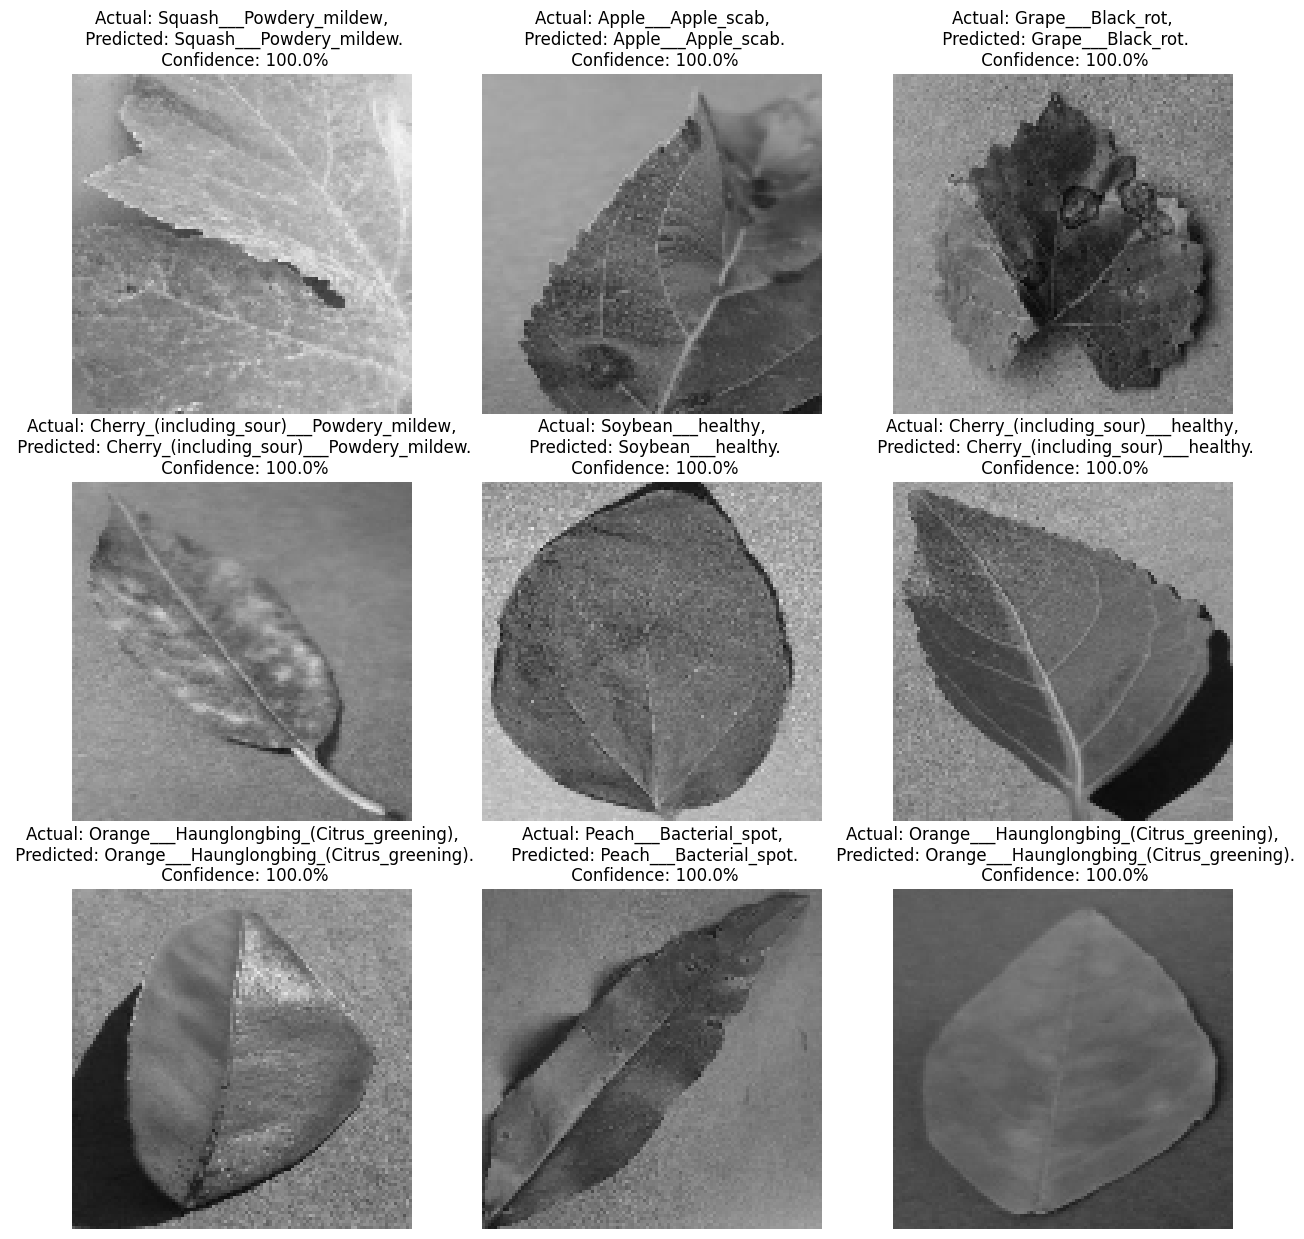

In [20]:
plt.figure(figsize=(15, 15))

for images, lbs in val_ds.take(1):
    for i in range(9):
        
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint32"))
        
        predicted_class, confidence = predict2(model, images[i])
        actual_class = class_names[lbs[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {100*confidence}%")
        
        plt.axis("off")


In [21]:
model.save("Model.h5")

# Explatation

In [22]:
import numpy as np
import shap
import lime
import eli5

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 31ms/step


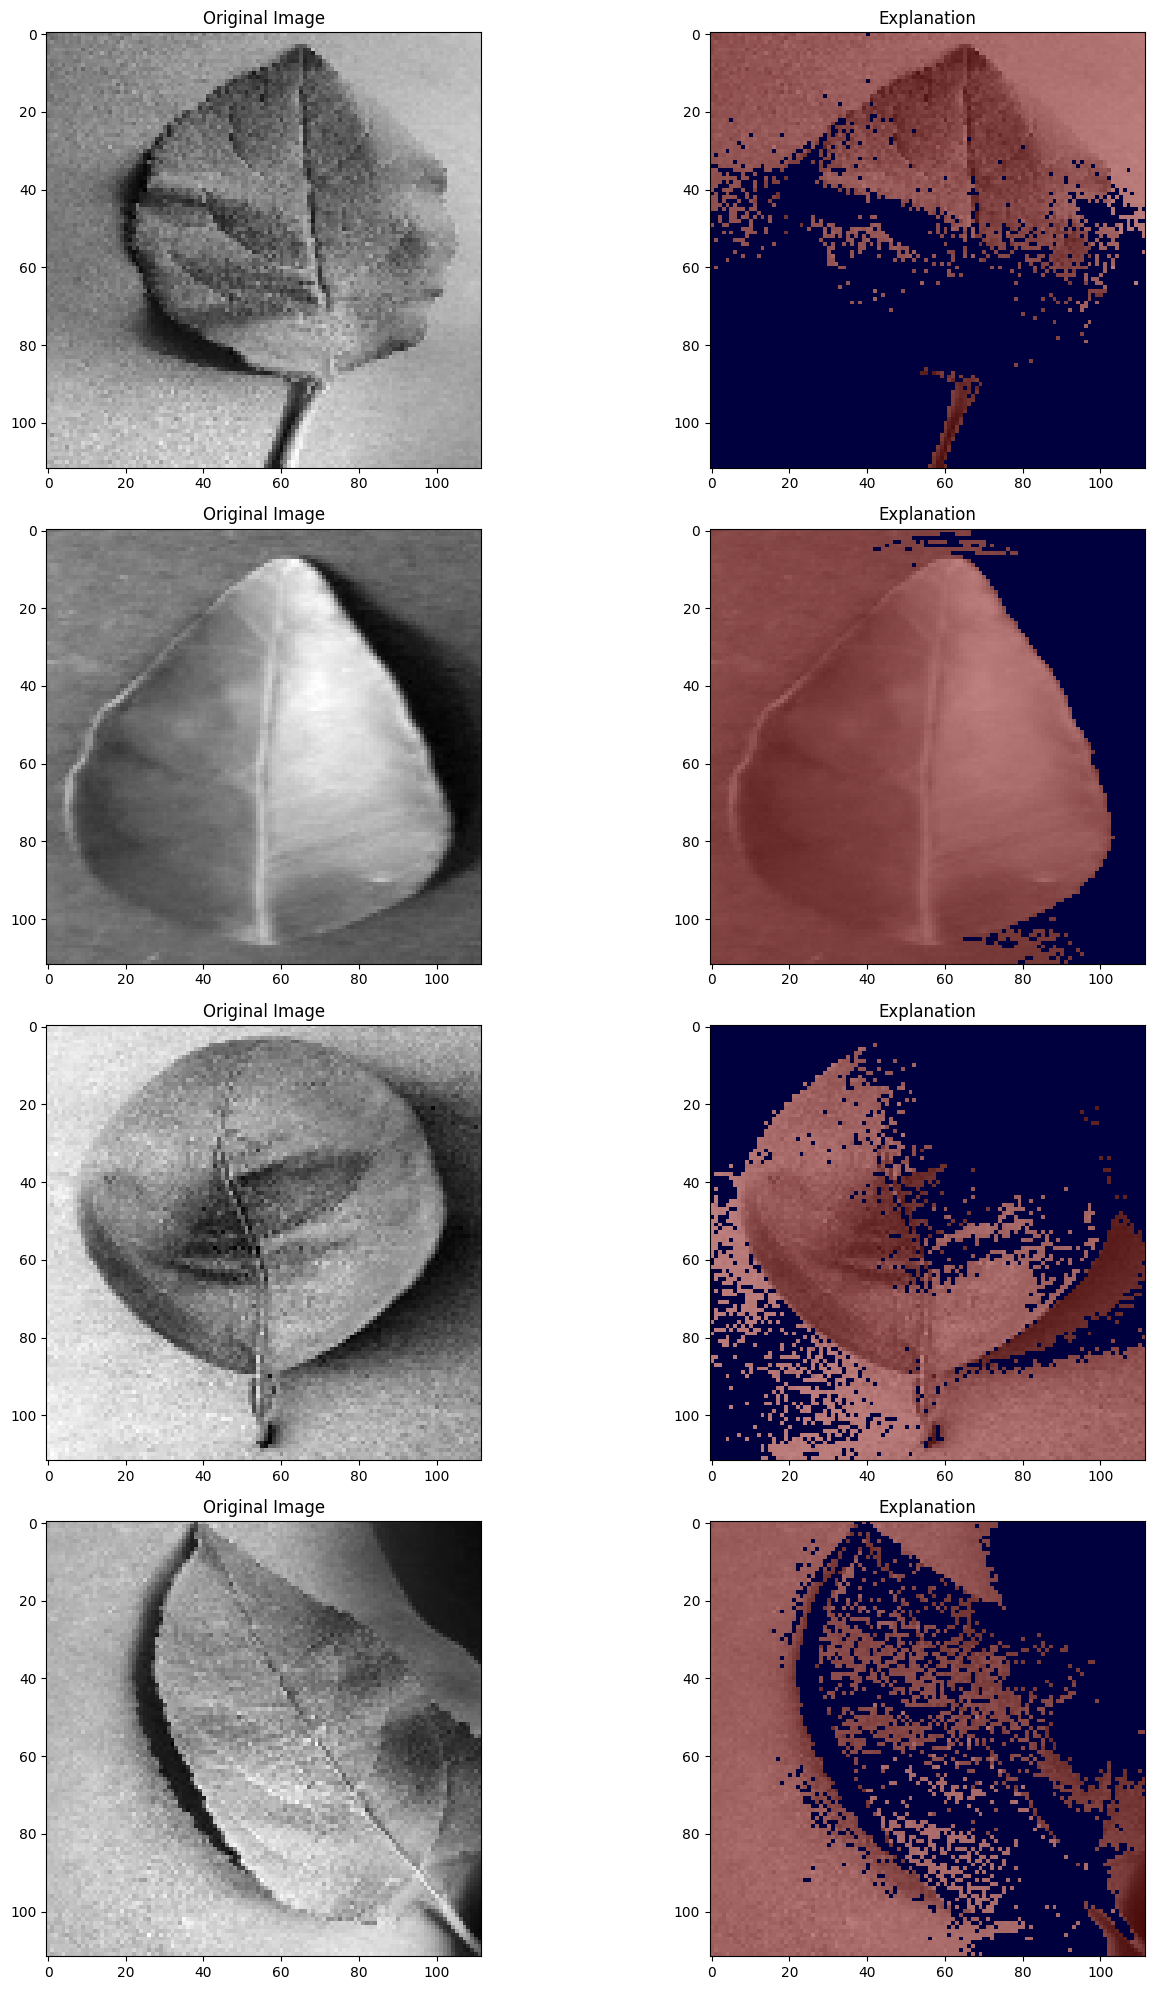

In [23]:
from lime import lime_image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

def model_predict(img_array):
    """准备图像并使用模型进行预测。"""
    predictions = model.predict(img_array)
    return predictions

# 初始化LIME图像解释器
explainer = lime_image.LimeImageExplainer()

# 设置图像显示的大小
plt.figure(figsize=(15, 20))

# 从测试集中选择4张图像
for i, (img, label) in enumerate(test_ds.take(4)):  
    img_to_explain = img.numpy()[0]  

    # 解释预测
    explanation = explainer.explain_instance(img_to_explain.astype('double'), model_predict, top_labels=5, hide_color=0, num_samples=1000)

    # 获取顶部类别的图像和掩码
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)

    # 调整图像大小
    img_to_explain = image.array_to_img(img_to_explain, scale=True)
    temp = image.array_to_img(temp, scale=True)

    # 绘制原始图像和解释结果
    plt.subplot(4, 2, i*2 + 1)
    plt.imshow(img_to_explain)
    plt.title("Original Image")

    plt.subplot(4, 2, i*2 + 2)
    plt.imshow(temp)
    plt.imshow(mask, cmap='jet', alpha=0.5)
    plt.title("Explanation")

plt.tight_layout()
plt.show()


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 1500x2000 with 0 Axes>

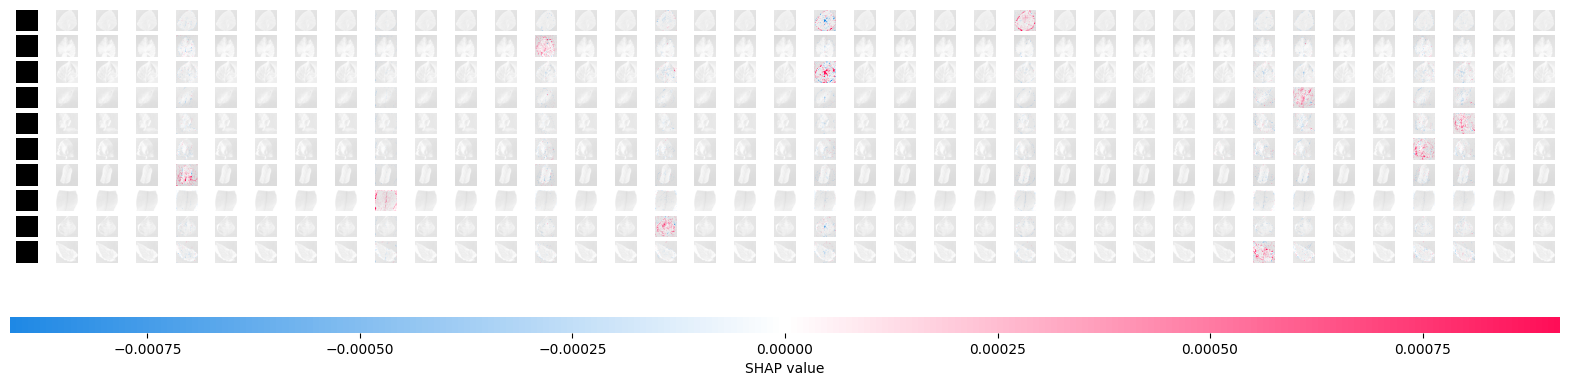

In [24]:
import numpy as np
import shap
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough # 解决"shap_ADDV2"问题
shap.explainers._deep.deep_tf.op_handlers["FusedBatchNormV3"] = shap.explainers._deep.deep_tf.passthrough # 允许运行DeepExplainer。


# 准备数据
test_images, test_labels = next(iter(test_ds.unbatch().batch(10)))  # 获取10个测试样本

# 创建SHAP DeepExplainer
background = test_images[:100].numpy()  # 将其转换为NumPy数组，并使用一部分测试图像作为背景
explainer = shap.DeepExplainer(model, background)

# 计算SHAP值
shap_values = explainer.shap_values(test_images[:10].numpy())  # 在传递之前转换为NumPy数组


# 设置图像显示的大小
plt.figure(figsize=(15, 20))
# 可视化
shap.image_plot(shap_values, -test_images[:10].numpy())  # 在传递之前转换为NumPy数组
